In [2]:
import sys, os
sys.path.append(os.pardir)

In [15]:
from pathlib import Path
import numpy as np
import polars as pl
import os
from hydra import initialize, compose

with initialize(config_path="../run/conf", version_base=None):
    cfg = compose("cv_train")

## 元データの形式を揃える

In [12]:
from pathlib import Path
import numpy as np
import polars as pl
import os

import glob
csv_list = glob.glob("../input/additional/csv/*")


In [11]:
csv_list

['../input/additional/csv/48_locationNA.csv',
 '../input/additional/csv/51_locationNA.csv',
 '../input/additional/csv/21_locationNA.csv',
 '../input/additional/csv/45_locationNA.csv',
 '../input/additional/csv/38_locationNA.csv',
 '../input/additional/csv/42_locationNA.csv',
 '../input/additional/csv/32_locationNA.csv',
 '../input/additional/csv/52_locationNA.csv',
 '../input/additional/csv/56_locationNA.csv',
 '../input/additional/csv/1_locationNA.csv',
 '../input/additional/csv/31_locationNA.csv',
 '../input/additional/csv/59_locationNA.csv',
 '../input/additional/csv/57_locationNA.csv',
 '../input/additional/csv/39_locationNA.csv',
 '../input/additional/csv/53_locationNA.csv',
 '../input/additional/csv/34_locationNA.csv',
 '../input/additional/csv/17_locationNA.csv',
 '../input/additional/csv/49_locationNA.csv',
 '../input/additional/csv/28_locationNA.csv',
 '../input/additional/csv/60_locationNA.csv',
 '../input/additional/csv/2_locationNA.csv',
 '../input/additional/csv/29_locatio

In [55]:
dfs = []
for path in csv_list:
    df = pl.read_csv(path)
    df = df.with_columns(
        pl.Series(name="step", values=np.arange(len(df))).cast(pl.UInt32),
        pl.lit(Path(path).stem).alias('series_id'),
        pl.col("ENMO").cast(pl.Float32).alias('enmo'),
        pl.col("anglez").cast(pl.Float32)
    ).select(['series_id','step', 'timestamp', 'anglez', 'enmo'])
    print(path,len(df))
    dfs.append(df)

    psg_df = pl.concat(dfs)

psg_df.write_parquet('../input/child-mind-institute-detect-sleep-states/psg_series.parquet')

../input/additional/csv/48_locationNA.csv 16020
../input/additional/csv/51_locationNA.csv 10000
../input/additional/csv/21_locationNA.csv 8280
../input/additional/csv/45_locationNA.csv 16000
../input/additional/csv/38_locationNA.csv 11000
../input/additional/csv/42_locationNA.csv 14580
../input/additional/csv/32_locationNA.csv 12600
../input/additional/csv/52_locationNA.csv 12240
../input/additional/csv/56_locationNA.csv 16560
../input/additional/csv/1_locationNA.csv 8280
../input/additional/csv/31_locationNA.csv 12600
../input/additional/csv/59_locationNA.csv 12960
../input/additional/csv/57_locationNA.csv 15000
../input/additional/csv/39_locationNA.csv 13000
../input/additional/csv/53_locationNA.csv 16000
../input/additional/csv/34_locationNA.csv 29001
../input/additional/csv/17_locationNA.csv 8280
../input/additional/csv/49_locationNA.csv 8600
../input/additional/csv/28_locationNA.csv 14000
../input/additional/csv/60_locationNA.csv 13500
../input/additional/csv/2_locationNA.csv 8280

In [45]:
psg_df = pl.read_parquet('../input/child-mind-institute-detect-sleep-states/psg_series.parquet')
print(psg_df.head())

shape: (5, 5)
┌───────────────┬──────┬──────────────────────────┬────────────┬────────┐
│ series_id     ┆ step ┆ timestamp                ┆ anglez     ┆ enmo   │
│ ---           ┆ ---  ┆ ---                      ┆ ---        ┆ ---    │
│ str           ┆ u32  ┆ str                      ┆ f32        ┆ f32    │
╞═══════════════╪══════╪══════════════════════════╪════════════╪════════╡
│ 48_locationNA ┆ 0    ┆ 2015-04-08T18:15:00+0900 ┆ -66.057899 ┆ 0.0075 │
│ 48_locationNA ┆ 1    ┆ 2015-04-08T18:15:05+0900 ┆ -66.066704 ┆ 0.0077 │
│ 48_locationNA ┆ 2    ┆ 2015-04-08T18:15:10+0900 ┆ -66.084999 ┆ 0.0078 │
│ 48_locationNA ┆ 3    ┆ 2015-04-08T18:15:15+0900 ┆ -66.047699 ┆ 0.0077 │
│ 48_locationNA ┆ 4    ┆ 2015-04-08T18:15:20+0900 ┆ -66.024696 ┆ 0.0078 │
└───────────────┴──────┴──────────────────────────┴────────────┴────────┘


In [52]:
len(psg_df)

380181

In [35]:
# 形式のチェック
test_df = pl.read_parquet(Path(cfg.dir.data_dir) / "test_series.parquet")
print(test_df.head())

shape: (5, 5)
┌──────────────┬──────┬──────────────────────────┬────────┬────────┐
│ series_id    ┆ step ┆ timestamp                ┆ anglez ┆ enmo   │
│ ---          ┆ ---  ┆ ---                      ┆ ---    ┆ ---    │
│ str          ┆ u32  ┆ str                      ┆ f32    ┆ f32    │
╞══════════════╪══════╪══════════════════════════╪════════╪════════╡
│ 038441c925bb ┆ 0    ┆ 2018-08-14T15:30:00-0400 ┆ 2.6367 ┆ 0.0217 │
│ 038441c925bb ┆ 1    ┆ 2018-08-14T15:30:05-0400 ┆ 2.6368 ┆ 0.0215 │
│ 038441c925bb ┆ 2    ┆ 2018-08-14T15:30:10-0400 ┆ 2.637  ┆ 0.0216 │
│ 038441c925bb ┆ 3    ┆ 2018-08-14T15:30:15-0400 ┆ 2.6368 ┆ 0.0213 │
│ 038441c925bb ┆ 4    ┆ 2018-08-14T15:30:20-0400 ┆ 2.6368 ┆ 0.0215 │
└──────────────┴──────┴──────────────────────────┴────────┴────────┘


## plotして確認

In [63]:
psg_df.with_columns(
            pl.col("timestamp").str.to_datetime("%Y-%m-%dT%H:%M:%S%z")
        )


series_id,step,timestamp,anglez,enmo
str,u32,"datetime[μs, UTC]",f32,f32
"""48_locationNA""",0,2015-04-08 09:15:00 UTC,-66.057899,0.0075
"""48_locationNA""",1,2015-04-08 09:15:05 UTC,-66.066704,0.0077
"""48_locationNA""",2,2015-04-08 09:15:10 UTC,-66.084999,0.0078
"""48_locationNA""",3,2015-04-08 09:15:15 UTC,-66.047699,0.0077
"""48_locationNA""",4,2015-04-08 09:15:20 UTC,-66.024696,0.0078
"""48_locationNA""",5,2015-04-08 09:15:25 UTC,-66.070999,0.0076
"""48_locationNA""",6,2015-04-08 09:15:30 UTC,-66.059097,0.0079
"""48_locationNA""",7,2015-04-08 09:15:35 UTC,-66.091698,0.0073
"""48_locationNA""",8,2015-04-08 09:15:40 UTC,-66.0187,0.0076


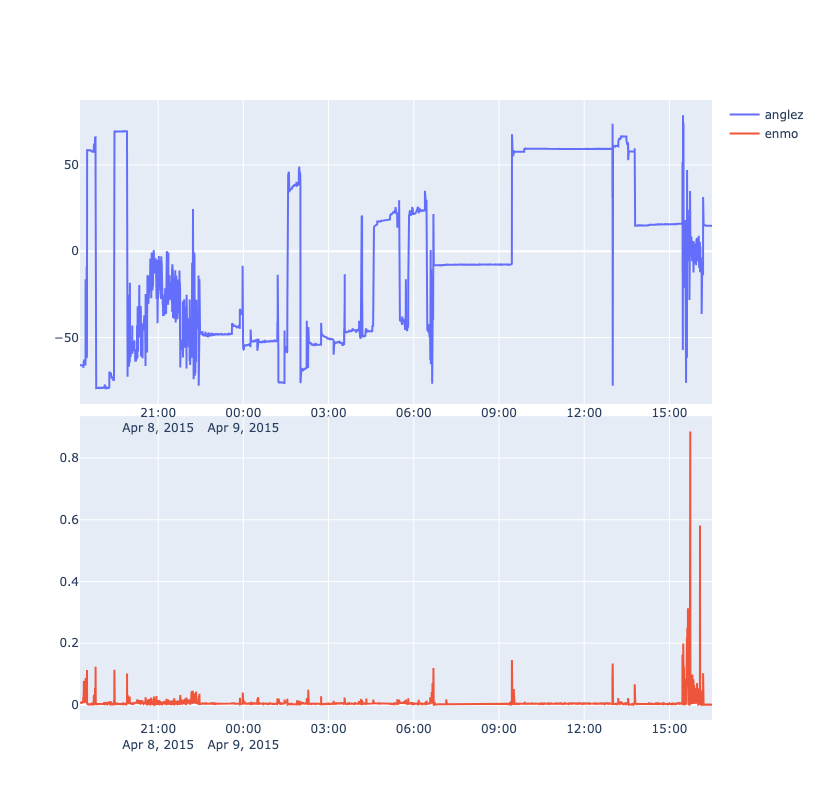

In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

ANGLEZ_MEAN = -8.810476
ANGLEZ_STD = 35.521877
ENMO_MEAN = 0.041315
ENMO_STD = 0.101829


def plot(series_id, seq_df):
    sample_serie = seq_df.filter(pl.col("series_id") == series_id)
    fig = make_subplots(rows=2,
                        cols=1,
                        shared_xaxes=False,
                        vertical_spacing=0.02)
    fig.update_layout(height=800)

    # enmo anglez
    fig.add_trace(go.Scatter(x=sample_serie['timestamp'], y=sample_serie['anglez'], mode='lines',name='anglez'), row=1, col=1)
    fig.add_trace(go.Scatter(x=sample_serie['timestamp'], y=sample_serie['enmo'], mode='lines',name='enmo'), row=2, col=1)
    fig.show()

series_id = "48_locationNA"
plot(series_id, psg_df)